# Augmented Reality
Here is an implementation of augmented reality which uses an 8x8 chessboard as a marker.


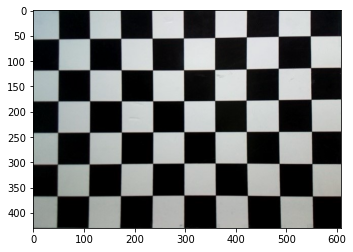

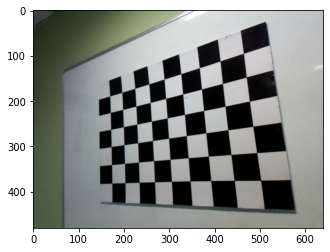

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the marker image. And display for illustration purpose.
marker_image = cv2.imread('Chess_Board.jpg')
ref_image = cv2.imread('image_12.jpg')

plt.imshow(marker_image)
plt.show()
plt.imshow(ref_image)
plt.show()

# Find the marker in each frame: Feature Detection and Matching
1. Feature Detection
Using SIFT algorithm for feature detection. https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

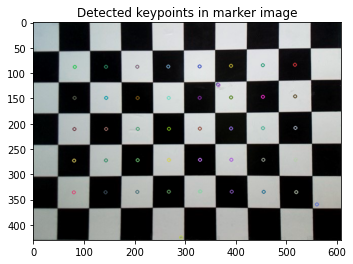

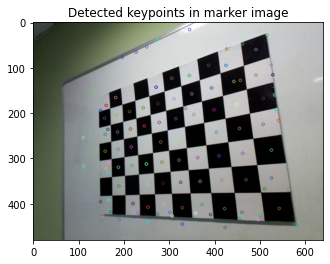

In [14]:
sift = cv2.SIFT_create()

def FEATURE_DETECTION(image):
    keypoints = sift.detect(image, None)
    return keypoints, cv2.drawKeypoints(image, keypoints, image)

marker_kps, marker_image_with_key_points = FEATURE_DETECTION(marker_image)
ref_kps, ref_image_with_key_points = FEATURE_DETECTION(ref_image)

plt.imshow(marker_image_with_key_points)
plt.title("Detected keypoints in marker image")
plt.show()

plt.imshow(ref_image_with_key_points)
plt.title("Detected keypoints in marker image")
plt.show()

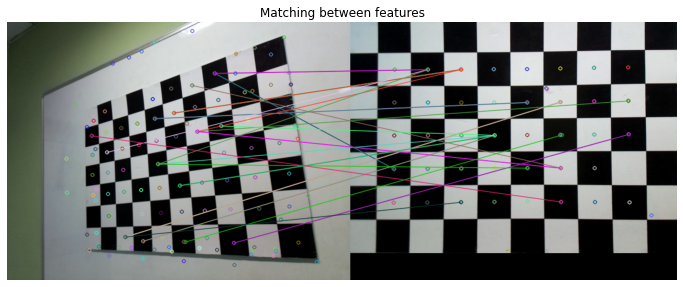

In [25]:
MIN_MATCHES = 40
bf  = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
def FEATURE_MATCHING(img):
    imgPts, imgDsc = sift.detectAndCompute(img, None)
    return imgPts, imgDsc

refImgPts, refImgDsc = FEATURE_MATCHING(ref_image)
markerImgPts, markerImgDsc = FEATURE_MATCHING(marker_image)

matches = bf.match(refImgDsc, markerImgDsc)
matches = sorted(matches, key = lambda x: x.distance)

if len(matches) > MIN_MATCHES:
    idxMatchPairs = cv2.drawMatches(ref_image, refImgPts, marker_image, markerImgPts,
                                   matches[:MIN_MATCHES], 0, flags = 2)
    
    
    plt.figure(figsize=(12, 6))
    plt.axis('off')
    plt.imshow(idxMatchPairs, cmap='gray')
    plt.title('Matching between features')
    plt.show()
else:
    print("not enough matches")

# Open the live camera using OpenCV; read each frame.

In [7]:
#How to read frames from live camera; https://docs.opencv.org/3.4/dd/d43/tutorial_py_video_display.html

camera = cv2.VideoCapture(0)

if not camera.isOpened():
    print("Cannot open camera")
    exit()

img_counter = 0

while True:
    # Capture camera frame-by-frame
    ret, frame = camera.read()
    
    if ret == False:
        print("Stream ended. Abort.")
        break
    #detect features of a frame
    kp, frame_with_key_points = FEATURE_DETECTION(frame)
    
    cv2.imshow("augmented reality program", frame_with_key_points)

    if cv2.waitKey(1) == ord('q'):
        break


camera.release()
cv2.destroyAllWindows()